In [3]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

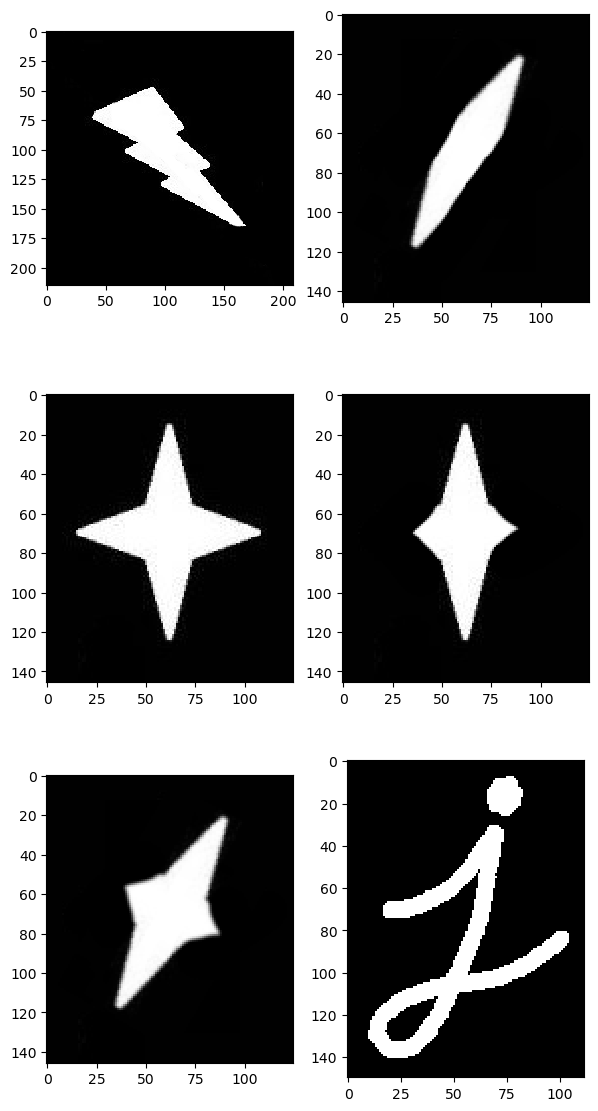

In [54]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [5]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

I would expect the value to be the brightness of a pixel, where it is actually just how white the pixel is.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


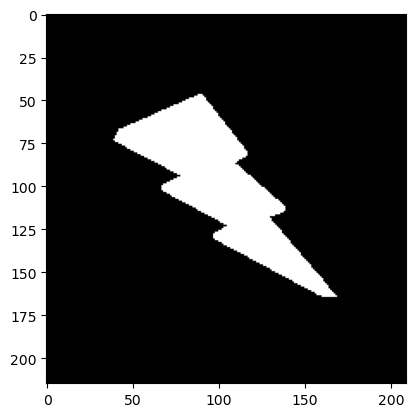

In [ ]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray')

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

No clear change to the images will occur, but the lightning bolt will become slightly sharper. A "good" value is 127.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

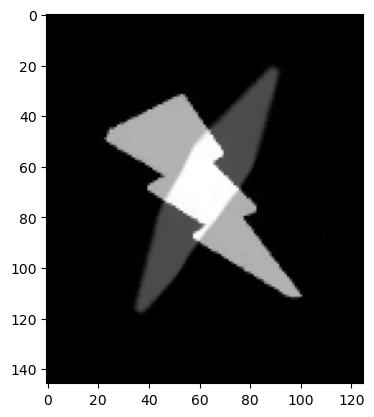

In [41]:
# 1. Blend
ht, wid = blob.shape
lightningmod = cv2.resize(lightningbolt, (wid, ht))

blend = cv2.addWeighted(lightningmod, 0.7, blob, 0.3, 0)

plt.imshow(blend, cmap = "gray")

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

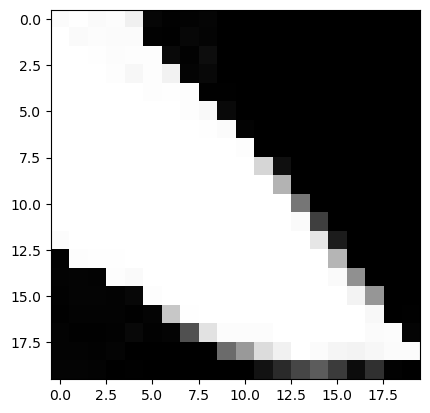

In [42]:
# 2. ROI
lightningtip = lightningbolt[146:166, 149:169]
plt.imshow(lightningtip, cmap="gray")

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

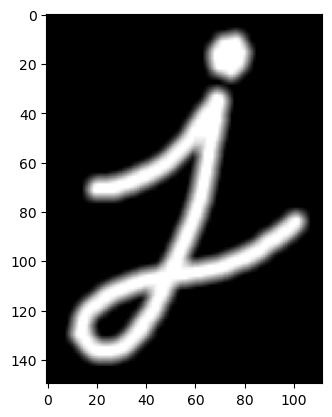

In [35]:
# 3. 
jblur = cv2.blur(letterj, (5, 5))

plt.imshow(jblur, cmap="gray")

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

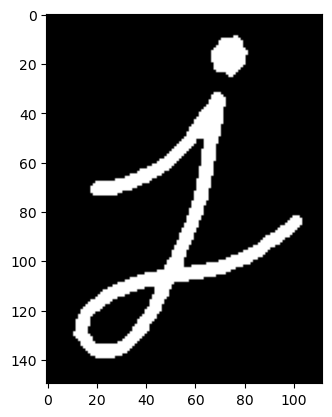

In [ ]:
# 4
j_eroded_3 = cv2.erode(letterj, np.ones((3, 3), np.uint8), iterations=1)
plt.imshow(j_eroded_3, cmap = "gray")

## 5. Perform erosion on j with a 5x5 kernel

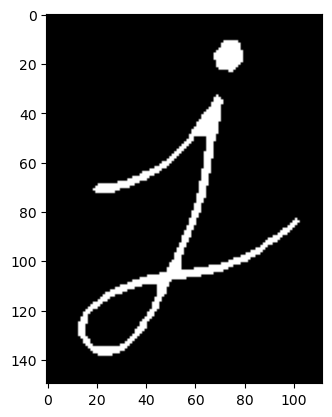

In [37]:
# 5
j_eroded_5 = cv2.erode(letterj, np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(j_eroded_5, cmap = "gray")

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



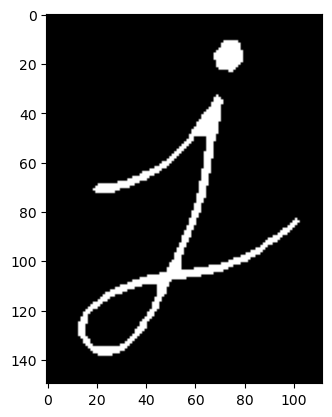

In [38]:
# 6
j_eroded_twice = cv2.erode(letterj, np.ones((3, 3), np.uint8), iterations=2)
plt.imshow(j_eroded_twice, cmap = "gray")

## 7. Perform dilation on j with a 3x3 kernel

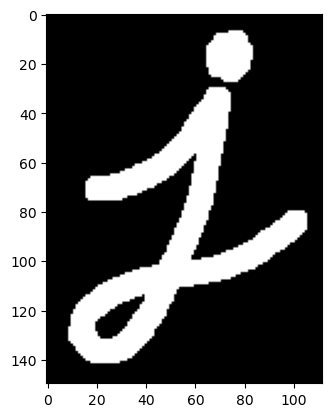

In [39]:
# 7
j_dilated_3 = cv2.dilate(letterj, np.ones((3, 3), np.uint8), iterations=1)
plt.imshow(j_dilated_3, cmap = "gray")

## 8. Perform dilation on j with a 5x5 kernel

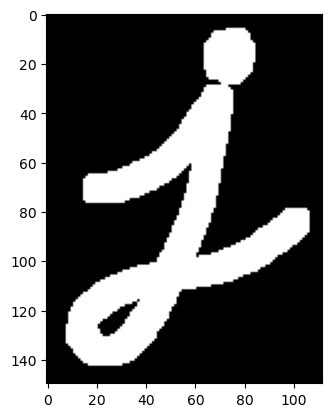

In [40]:
# 8
j_dilated_5 = cv2.dilate(letterj, np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(j_dilated_5, cmap = "gray")

## 9. What is the effect of kernel size on morphology operations?

# 9
Kernel size seems to affect how extreme a morphology operation is, that is to say how large of an area difference the image foregrounds will have.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

# 10
I expect that a repeated morphology op with a smaller kernel will better preserve the detail of an image, but it sacrifices the faster speeds of one large operation.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

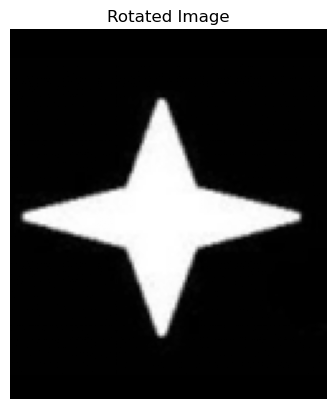

In [44]:
rows, cols = star.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(dst, cmap="gray")
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

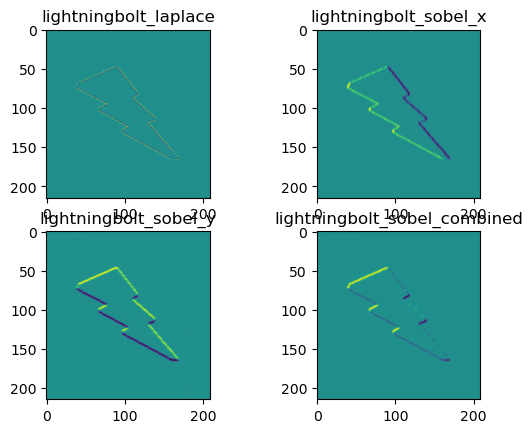

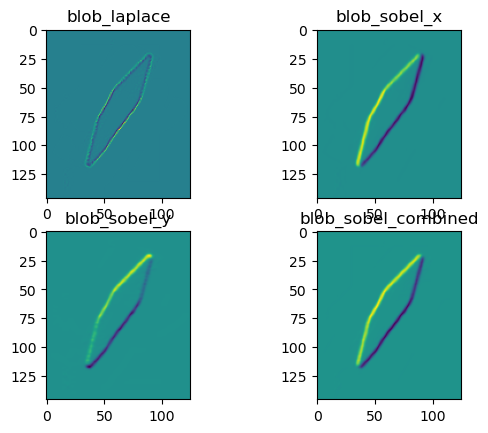

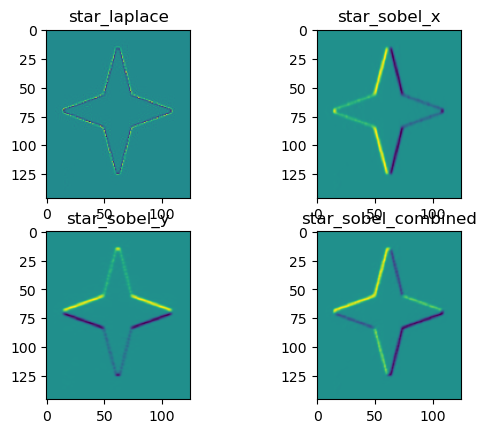

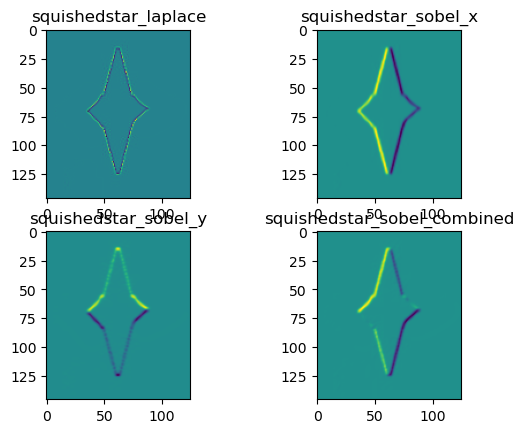

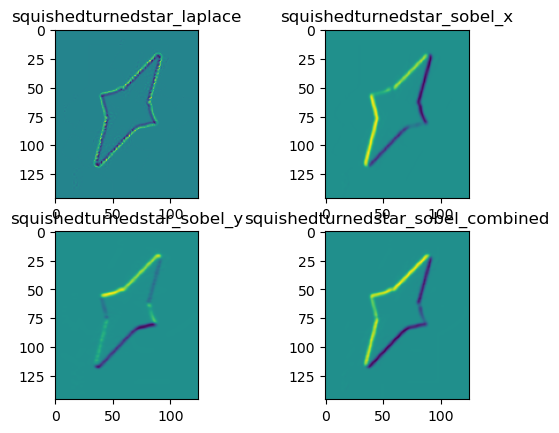

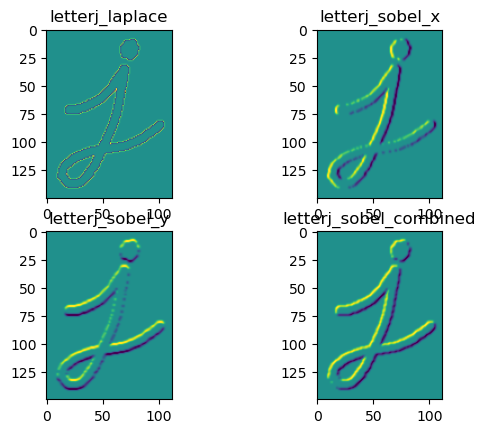

In [69]:
n_index = 0

names = ["lightningbolt", "blob", "star", "squishedstar", "squishedturnedstar", "letterj"]

for img in images:
    plt.subplot(2, 2, 1)
    plt.title(names[n_index] + "_laplace")
    plt.imshow(cv2.Laplacian(img, ddepth=cv2.CV_64F))
    
    plt.subplot(2, 2, 2)
    plt.title(names[n_index] + "_sobel_x")
    sobel_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.imshow(sobel_x)

    plt.subplot(2, 2, 3)
    plt.title(names[n_index] + "_sobel_y")
    sobel_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.imshow(sobel_y)

    plt.subplot(2, 2, 4)
    plt.title(names[n_index] + "_sobel_combined")
    plt.imshow(cv2.addWeighted(sobel_x, .5, sobel_y, .5, 0))
    
    n_index += 1
    plt.show()
